In [1]:
import math
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iterations=500):
        self.k = k
        self.tolerance = 0.0001
        self.max_iterations = max_iterations
        
    def calc_distance(self, p1, p2):
        sq_dist = 0
        for i in range(len(p1)):
            sq_dist += (p1[i] - p2[i])**2
        return math.sqrt(sq_dist)
    
    def fit(self, data, centroids):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = centroids[i]
        
        self.sicds = []
        for i in range(self.max_iterations):
            self.classes = {}
            self.pred = []
            for i in range(self.k):
                self.classes[i] = []
                
            sicd = 0
            for point in data:
                distances = []
                for centroid in self.centroids:
                    dist = self.calc_distance(point, self.centroids[centroid])
                    distances.append(dist)
                
                cluster = distances.index(min(distances))
                self.pred.append(cluster)
                self.classes[cluster].append(point)
                if cluster > 2 or cluster < 0:
                    raise Exception('Incorrect Cluster')
                
                sicd += (min(distances))**2
            
            self.sicds.append(sicd)
            prev_cent = dict(self.centroids)
            
            for cluster in self.classes:
                self.centroids[cluster] = np.mean(self.classes[cluster], axis=0)

            
            isOptimal = False
            flag = 0
            for centroid in self.centroids:
                org_centroid = prev_cent[centroid]
                curr_centroid = self.centroids[centroid]
                if (org_centroid == curr_centroid).all():
                    flag += 1
                    
            if flag == 3:
                isOptimal =True
                    
            if isOptimal:
                break

In [2]:
# libraries for loading data and graph plotting
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import style
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

style.use('ggplot')

In [3]:
iris = datasets.load_iris()
# reading and shuffling input
X, y = shuffle(iris.data, iris.target, random_state=1126) # random_state is done so that results can be reporduced
X = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(y, columns=['Target'])

In [4]:
# K means clustering on iris dataset
km = KMeans(3, 500)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=1608)
print(centroids)
km.fit(X.values, centroids.values)

    Sepal Length  Sepal Width  Petal Length  Petal Width
6            4.4          3.0           1.3          0.2
73           6.0          2.2           4.0          1.0
69           5.6          2.7           4.2          1.3


[293.25000000000006, 108.17299636149968, 85.6103010807329, 84.26527300347222, 83.39023263888889, 82.00418738904196, 81.08093414092328, 79.87357983461304, 79.34436414532671, 78.92130972222226, 78.85566582597727]


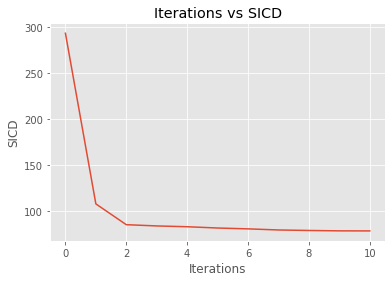

In [5]:
print(km.sicds)
# plot iterations vs SICD
plt.plot(km.sicds)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()

In [7]:
all_sicd = []
for i in range(0, 150):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    print(km.sicds[-1])
    del km

142.75406250000003
78.85566582597727
78.85144142614601
78.85144142614601
78.85566582597727
78.85144142614601
78.85566582597727
145.52518663348738
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
142.75406250000003
78.85566582597727
142.75406250000003
78.85566582597727
78.85144142614601
78.85144142614601
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
78.85566582597727
78.85566582597727
78.85144142614601
78.85144142614601
78.85566582597727
78.85566582597727
78.85144142614601
78.85566582597727
78.85566582597727
78.85566582597727
78.85566582597727
78.85144142614601
145.45269176485024
78.85566582597727
142.75406250000003
78.85566582597727
78.85566582597727
78.85566582597727
78.85144142614601
78.85566582597727
142.75406250000003
142.75406250000003
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
78.85144142614601
78.85566582597727
78.85566582597727
78.85566582597727
142.75406250000003
78.85144142614601
78.85566582597727
7

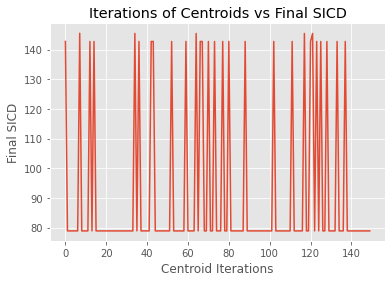

In [8]:
# All iterations
plt.plot(all_sicd)
plt.xlabel('Centroid Iterations')
plt.ylabel('Final SICD')
plt.title('Iterations of Centroids vs Final SICD')
plt.show()